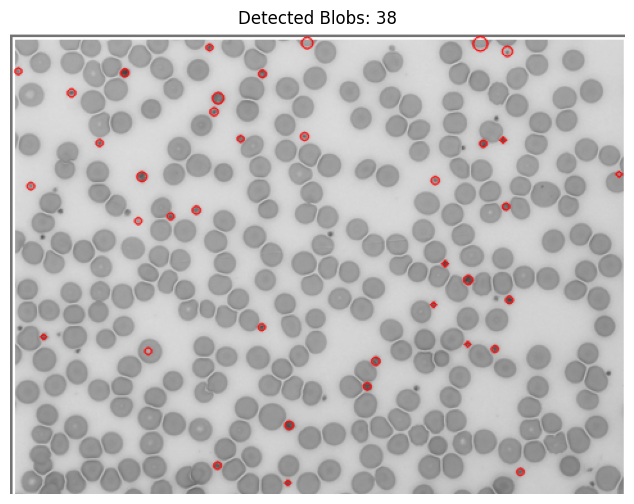

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/blob_detect.png"  # Path to the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Set up the SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area (to avoid detecting noise)
params.filterByArea = True
params.minArea = 10   # Minimum size of a blob
params.maxArea = 100 # Maximum size of a blob

# Filter by Circularity (to detect round objects)
params.filterByCircularity = True
params.minCircularity = 0.3  # Ensures detected blobs are circular

# Filter by Color (detect dark or bright blobs)
params.filterByColor = False

# Create a SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(blurred)

# Draw detected blobs on the image
blob_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
blob_image = cv2.drawKeypoints(blob_image, keypoints, None, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display results
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Blobs: {len(keypoints)}")
plt.axis('off')
plt.show()


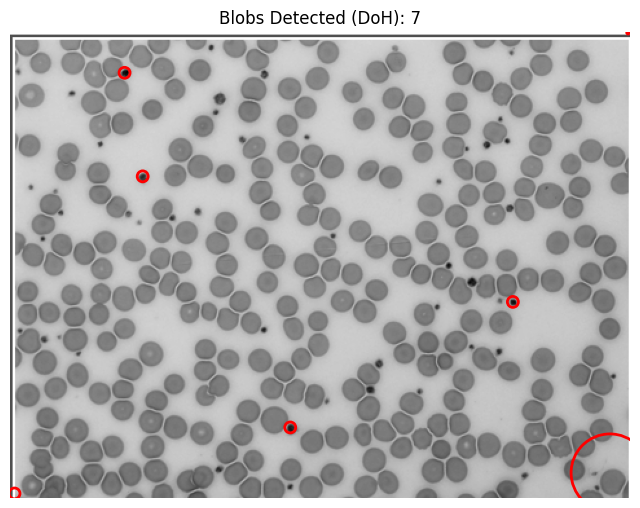

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_doh
from skimage.color import rgb2gray
from skimage import io

# Read the image
img_path = '/content/blob_detect.png'  # Update this if your image path is different
image_bgr = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
gray_image = rgb2gray(image_rgb)  # Convert to grayscale (0-1 float)

# Apply DoH blob detection
blobs = blob_doh(gray_image, max_sigma=30, threshold=0.009)

# Plot the image and overlay blobs
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(gray_image, cmap='gray')

# Draw red circles around detected blobs
for blob in blobs:
    y, x, r = blob
    circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(circle)

ax.set_title(f"Blobs Detected (DoH): {len(blobs)}")
ax.axis("off")
plt.show()


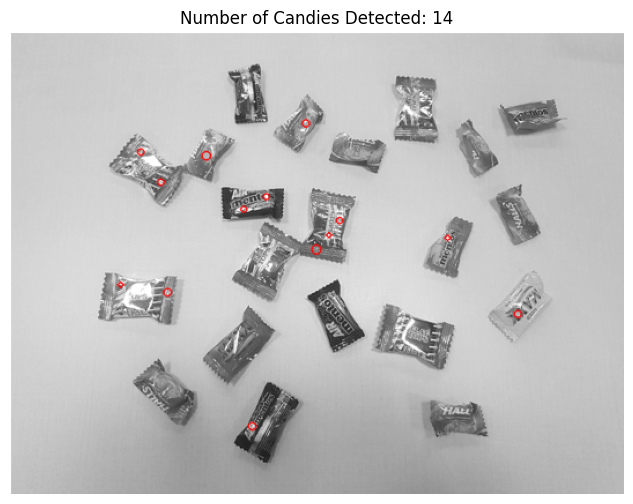

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "/content/candy.png"  # Update this path as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocessing - Reduce noise using Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Invert image if objects are darker than the background
if np.mean(blurred) > 127:
    blurred = cv2.bitwise_not(blurred)

# Set up the SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area (to avoid detecting noise)
params.filterByArea = True
params.minArea =    13# Minimum size of a blob
params.maxArea = 5000  # Maximum size of a blob

# Filter by Circularity (since candies are mostly round)
params.filterByCircularity = True
params.minCircularity = 0.3  # Ensures detected blobs are circular

# Filter by Color (set True if detecting bright objects)
params.filterByColor = False

# Create a SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(blurred)

# Draw detected blobs on the image
blob_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
blob_image = cv2.drawKeypoints(blob_image, keypoints, None, (0, 0, 255),
                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display results
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
plt.title(f"Number of Candies Detected: {len(keypoints)}")
plt.axis('off')
plt.show()


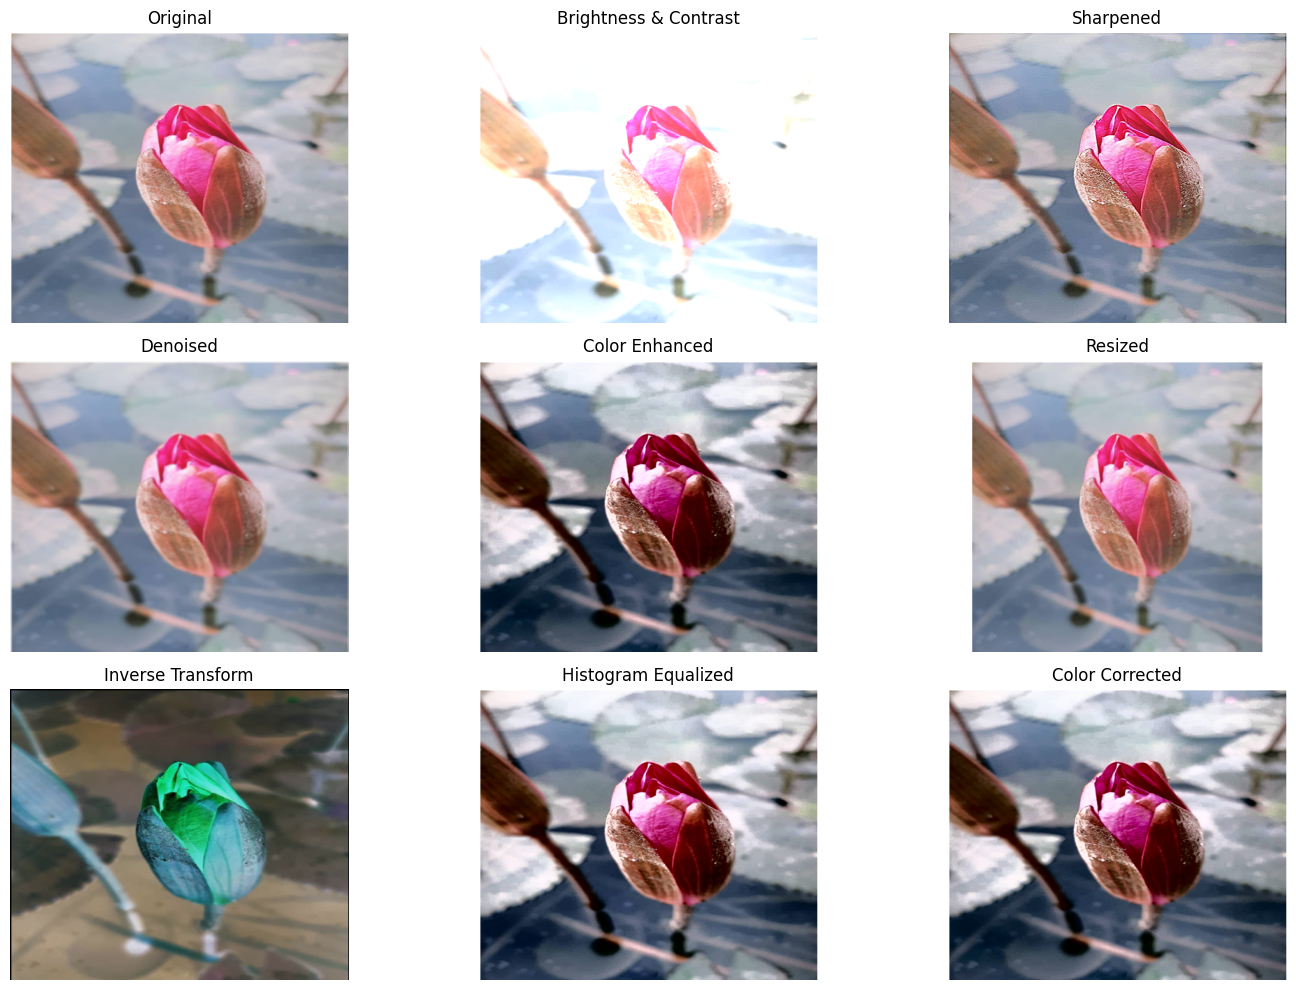

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (Replace with your actual image path)
image_path = "/content/Screenshot 2025-04-04 022653.png"
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Error loading image. Check the file path.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### 1. Adjust Brightness & Contrast
def adjust_brightness_contrast(img, alpha=1.5, beta=50):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

bright_contrast = adjust_brightness_contrast(image)

### 2. Sharpening the Image
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, sharpening_kernel)

### 3. Noise Removal (Gaussian Blur)
denoised = cv2.GaussianBlur(image, (5, 5), 0)

### 4. Color Enhancement (for color images)
def enhance_color(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)
    enhanced_lab = cv2.merge([l, a, b])
    return cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

color_enhanced = enhance_color(image)

### 5. Resizing & Scaling
resized = cv2.resize(image, (512, 512))

### 6. Inverse Transform (Negative Image)
inverse = cv2.bitwise_not(image)

### 7. Histogram Equalization (Contrast Enhancement)
hist_equalized = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
hist_equalized[:, :, 0] = cv2.equalizeHist(hist_equalized[:, :, 0])
hist_equalized = cv2.cvtColor(hist_equalized, cv2.COLOR_YUV2BGR)

### 8. Super-Resolution using OpenCV DNN
def super_resolve(img):
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    sr.readModel("EDSR_x3.pb")  # Pre-trained model required
    sr.setModel("edsr", 3)  # EDSR model with 3x upscaling
    return sr.upsample(img)

# Uncomment the below line if you have the model
# super_resolved = super_resolve(image)

### 9. Color Correction (White Balance)
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(result)
    l = cv2.equalizeHist(l)
    balanced = cv2.merge([l, a, b])
    return cv2.cvtColor(balanced, cv2.COLOR_LAB2BGR)

color_corrected = white_balance(image)

# Display results
enhancements = [
    ("Original", image),
    ("Brightness & Contrast", bright_contrast),
    ("Sharpened", sharpened),
    ("Denoised", denoised),
    ("Color Enhanced", color_enhanced),
    ("Resized", resized),
    ("Inverse Transform", inverse),
    ("Histogram Equalized", hist_equalized),
    ("Color Corrected", color_corrected)
]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, (title, img) in zip(axes.flat, enhancements):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.0146 - loss: 4.5390 - val_accuracy: 0.0484 - val_loss: 4.1665
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.0497 - loss: 4.1524 - val_accuracy: 0.1183 - val_loss: 3.7281
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.0998 - loss: 3.7939 - val_accuracy: 0.1822 - val_loss: 3.4340
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1512 - loss: 3.4966 - val_accuracy: 0.2157 - val_loss: 3.2003
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.1944 - loss: 3.2578 - val_accuracy: 0.2648 - val_loss: 2.9679
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.2341 - loss: 3.0383 - val_accuracy: 0.3009 - val_loss: 2.7621
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.2729 - loss: 2.8440 - val_accuracy: 0.3309 - val_loss: 2.6104
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3075 - loss: 2.6661 - 

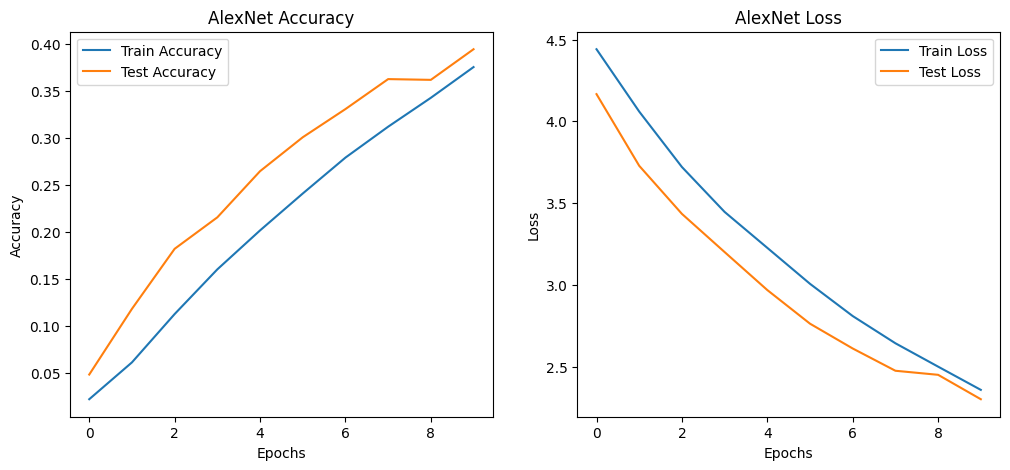

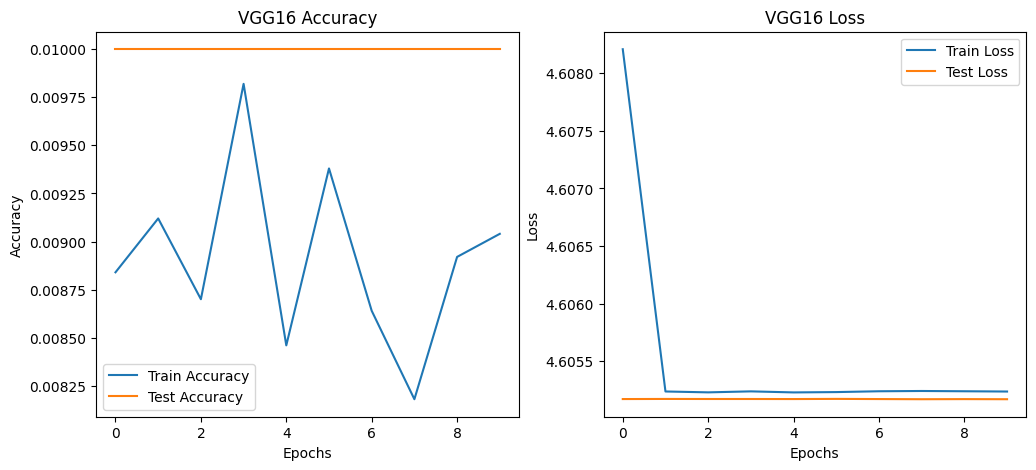

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Normalize images to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Model 1: AlexNet Implementation
def build_alexnet():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model

# Model 2: Load VGG16 with pre-trained weights (transfer learning)
def build_vgg16():
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model

# Compile Models
def compile_model(model):
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train and Evaluate Model
def train_and_evaluate(model, name, epochs=10, batch_size=64):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    inference_time = time.time() - start_time
    test_loss, test_acc = model.evaluate(x_test, y_test)
    return history, test_loss, test_acc, inference_time

# Train AlexNet
alexnet = build_alexnet()
compile_model(alexnet)
history_alexnet, loss_alex, acc_alex, time_alex = train_and_evaluate(alexnet, "AlexNet")

# Train VGG16
vgg16 = build_vgg16()
compile_model(vgg16)
history_vgg16, loss_vgg, acc_vgg, time_vgg = train_and_evaluate(vgg16, "VGG16")

# Compare Performance
print(f"AlexNet - Test Accuracy: {acc_alex:.4f}, Inference Time: {time_alex:.2f}s")
print(f"VGG16  - Test Accuracy: {acc_vgg:.4f}, Inference Time: {time_vgg:.2f}s")

# Plot Accuracy and Loss
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history_alexnet, "AlexNet")
plot_metrics(history_vgg16, "VGG16")
